In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('ColumnFinal2.csv')
x=df.drop('Label',axis=1)
y=df.Label
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=47, hidden_size=84, num_layers=4, batch_first=True)
        self.fc2 = nn.Linear(84, 152)
        self.fc3 = nn.Linear(152, 93)
        self.fc4 = nn.Linear(93, 75)
        self.fc5 = nn.Linear(75, 123)
        self.fc6 = nn.Linear(123, 89)
        self.fc7 = nn.Linear(89, 40)
        self.fc8 = nn.Linear(40, 15)
        self.fc9 = nn.Linear(15, 1) 
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.tanh(self.fc2(x))
        x = self.softmax(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))
        x = self.lrelu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.lrelu(self.fc8(x))
        x = self.sigmoid(self.fc9(x))
        return x

# Load and preprocess the dataset
# Assuming you have your data in a NumPy array called 'data'
data = x  # Your dataset with shape (913, 23)
labels = y  # Your corresponding labels with shape (913,)
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for the output
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Create PyTorch DataLoader for efficient batch processing
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
model = AirModel()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adagrad(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss for each epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

# Evaluation on the validation set
with torch.no_grad():
    model.eval()
    val_outputs = model(X_val)
    val_predicted = (val_outputs >= 0.5).squeeze().long()
    val_accuracy = (val_predicted == y_val.squeeze().long()).sum().item() / len(y_val)

    print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    test_predicted = (test_outputs >= 0.5).squeeze().long()
    test_accuracy = (test_predicted == y_test.squeeze().long()).sum().item() / len(y_test)

    print(f"Test Accuracy: {test_accuracy:.4f}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_7868\109850487.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.fc3(x))


Epoch 1/10, Loss: 0.6938
Epoch 2/10, Loss: 0.6934
Epoch 3/10, Loss: 0.6932
Epoch 4/10, Loss: 0.6931
Epoch 5/10, Loss: 0.6932
Epoch 6/10, Loss: 0.6930
Epoch 7/10, Loss: 0.6929
Epoch 8/10, Loss: 0.6933
Epoch 9/10, Loss: 0.6933
Epoch 10/10, Loss: 0.6932
Validation Accuracy: 0.4795
Test Accuracy: 0.5137


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the neural network architecture

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm1 = nn.GRU(input_size=47, hidden_size=84, num_layers=1, batch_first=True)
        self.gru = nn.LSTM(input_size=93, hidden_size=84, num_layers=2, batch_first=True)
        self.fc2 = nn.Linear(84, 152)
        self.fc3 = nn.Linear(152, 93)
        self.fc4 = nn.Linear(84, 75)
        self.fc5 = nn.Linear(75, 123)
        self.fc6 = nn.Linear(123, 89)
        self.fc7 = nn.Linear(89, 40)
        self.fc8 = nn.Linear(40, 15)
        self.fc9 = nn.Linear(15, 1) 
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
    def forward(self, x):
        x, _ = self.lstm1(self.relu(x))
        x = self.tanh(self.fc2(x))
        x = self.softmax(self.fc3(x))
        x, _ = self.gru(self.relu(x))
        x = self.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))
        x = self.lrelu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.lrelu(self.fc8(x))
        x = self.sigmoid(self.fc9(x))
        return x

# Load and preprocess the dataset
# Assuming you have your data in a NumPy array called 'data'
data = x  # Your dataset with shape (913, 23)
labels = y  # Your corresponding labels with shape (913,)
data = np.array(data)
labels = np.array(labels)

# Split the dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for the output
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

# Create PyTorch DataLoader for efficient batch processing
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Define the neural network model
model = AirModel()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adagrad(model.parameters(), lr=0.001)

# Training loop
epochs = 500
train_losses=[]
train_accu = []
for epoch in range(epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        predicted = (outputs>=0.5).squeeze().long()
        correct_predictions += (predicted == labels.squeeze().long()).sum().item()
        total_samples += len(labels)

    # Print the average loss for each epoch
    accuracy = 100*correct_predictions / total_samples
    train_accu.append(accuracy)
    print(accuracy)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")
    train_losses.append(running_loss/len(train_loader))

# Evaluation on the validation set
with torch.no_grad():
    model.eval()
    val_outputs = model(X_val)
    val_predicted = (val_outputs >= 0.5).squeeze().long()
    val_accuracy = (val_predicted == y_val.squeeze().long()).sum().item() / len(y_val)

    print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluation on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    test_predicted = (test_outputs >= 0.5).squeeze().long()
    test_accuracy = (test_predicted == y_test.squeeze().long()).sum().item() / len(y_test)

    print(f"Test Accuracy: {test_accuracy:.4f}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_7868\181857307.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.fc3(x))


50.085763293310464
Epoch 1/500, Loss: 0.6976
50.085763293310464
Epoch 2/500, Loss: 0.6927
50.085763293310464
Epoch 3/500, Loss: 0.6957
50.085763293310464
Epoch 4/500, Loss: 0.6926
50.085763293310464
Epoch 5/500, Loss: 0.6926
50.085763293310464
Epoch 6/500, Loss: 0.6926
50.085763293310464
Epoch 7/500, Loss: 0.6917
50.085763293310464
Epoch 8/500, Loss: 0.6908
50.085763293310464
Epoch 9/500, Loss: 0.6944
50.085763293310464
Epoch 10/500, Loss: 0.6933
50.085763293310464
Epoch 11/500, Loss: 0.6933
50.085763293310464
Epoch 12/500, Loss: 0.6941
50.085763293310464
Epoch 13/500, Loss: 0.6932
50.085763293310464
Epoch 14/500, Loss: 0.6932
50.085763293310464
Epoch 15/500, Loss: 0.6919
50.085763293310464
Epoch 16/500, Loss: 0.6940
50.085763293310464
Epoch 17/500, Loss: 0.6919
50.085763293310464
Epoch 18/500, Loss: 0.6918
50.085763293310464
Epoch 19/500, Loss: 0.6925
50.085763293310464
Epoch 20/500, Loss: 0.6949
50.085763293310464
Epoch 21/500, Loss: 0.6925
50.085763293310464
Epoch 22/500, Loss: 0.69

In [35]:
#testing loop

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
epochs = 500
test_losses =[]
test_accu = []
for epoch in range(epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    for inputs, labels in test_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        predicted = (outputs>= 0.5).squeeze().long()
        correct_predictions += (predicted == labels.squeeze().long()).sum().item()
        total_samples += len(labels)
        accuracy = 100*correct_predictions/total_samples
    test_accu.append(accuracy)

    # Print the average loss for each epoch
    print(accuracy)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(test_loader):.4f}")
    test_losses.append(running_loss/len(test_loader))

C:\Users\Admin\AppData\Local\Temp\ipykernel_7868\181857307.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.fc3(x))


96.72131147540983
Epoch 1/500, Loss: 0.1363
96.72131147540983
Epoch 2/500, Loss: 0.1303
96.72131147540983
Epoch 3/500, Loss: 0.1344
96.17486338797814
Epoch 4/500, Loss: 0.1347
96.72131147540983
Epoch 5/500, Loss: 0.1247
96.17486338797814
Epoch 6/500, Loss: 0.1397
96.17486338797814
Epoch 7/500, Loss: 0.1281
96.72131147540983
Epoch 8/500, Loss: 0.1279
96.72131147540983
Epoch 9/500, Loss: 0.1227
96.72131147540983
Epoch 10/500, Loss: 0.1340
96.72131147540983
Epoch 11/500, Loss: 0.1272
96.72131147540983
Epoch 12/500, Loss: 0.1241
96.17486338797814
Epoch 13/500, Loss: 0.1301
96.72131147540983
Epoch 14/500, Loss: 0.1261
96.17486338797814
Epoch 15/500, Loss: 0.1178
96.17486338797814
Epoch 16/500, Loss: 0.1309
96.17486338797814
Epoch 17/500, Loss: 0.1308
96.17486338797814
Epoch 18/500, Loss: 0.1303
97.26775956284153
Epoch 19/500, Loss: 0.1119
96.72131147540983
Epoch 20/500, Loss: 0.1095
96.72131147540983
Epoch 21/500, Loss: 0.1158
96.17486338797814
Epoch 22/500, Loss: 0.1270
96.17486338797814
E

In [36]:
#testing loop

eval_dataset = TensorDataset(X_val, y_val)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=True)
epochs = 500
eval_losses =[]
eval_accu = []
for epoch in range(epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    for inputs, labels in eval_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        predicted = (outputs>= 0.5).squeeze().long()
        correct_predictions += (predicted == labels.squeeze().long()).sum().item()
        total_samples += len(labels)
        accuracy = 100*correct_predictions/total_samples
    eval_accu.append(accuracy)

    # Print the average loss for each epoch
    print(accuracy)

    # Print the average loss for each epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(eval_loader):.4f}")
    eval_losses.append(running_loss/len(eval_loader))

93.83561643835617
Epoch 1/500, Loss: 0.2936


C:\Users\Admin\AppData\Local\Temp\ipykernel_7868\181857307.py:34: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(self.fc3(x))


93.83561643835617
Epoch 2/500, Loss: 0.3266
93.83561643835617
Epoch 3/500, Loss: 0.2300
93.15068493150685
Epoch 4/500, Loss: 0.2407
92.46575342465754
Epoch 5/500, Loss: 0.1916
91.78082191780823
Epoch 6/500, Loss: 0.2167
93.83561643835617
Epoch 7/500, Loss: 0.1878
93.83561643835617
Epoch 8/500, Loss: 0.2189
93.83561643835617
Epoch 9/500, Loss: 0.2624
93.83561643835617
Epoch 10/500, Loss: 0.2250
93.15068493150685
Epoch 11/500, Loss: 0.1892
94.52054794520548
Epoch 12/500, Loss: 0.1817
93.83561643835617
Epoch 13/500, Loss: 0.2627
94.52054794520548
Epoch 14/500, Loss: 0.1838
93.83561643835617
Epoch 15/500, Loss: 0.1676
94.52054794520548
Epoch 16/500, Loss: 0.1586
94.52054794520548
Epoch 17/500, Loss: 0.1955
95.20547945205479
Epoch 18/500, Loss: 0.1822
95.20547945205479
Epoch 19/500, Loss: 0.1514
93.15068493150685
Epoch 20/500, Loss: 0.1545
94.52054794520548
Epoch 21/500, Loss: 0.1476
94.52054794520548
Epoch 22/500, Loss: 0.2860
95.20547945205479
Epoch 23/500, Loss: 0.1518
94.52054794520548


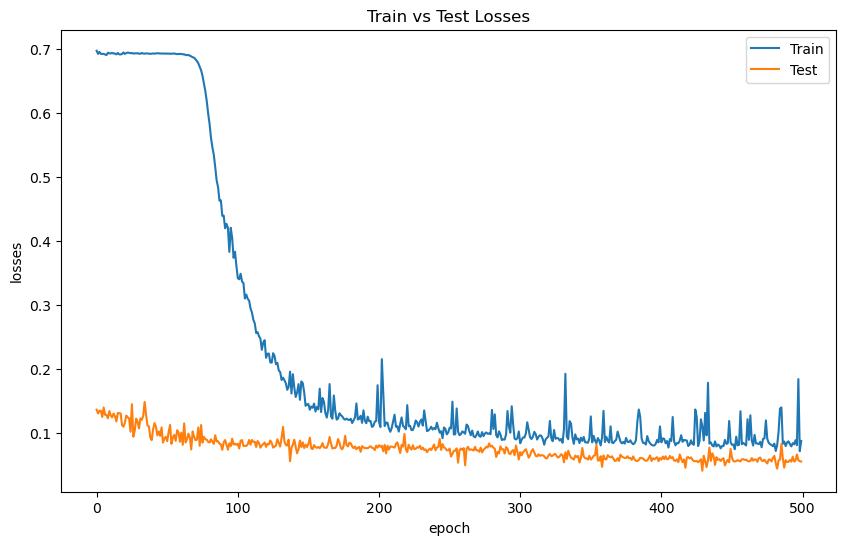

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,6)
plt.plot(train_losses,'-')
plt.plot(test_losses,'-')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')
 
plt.show()

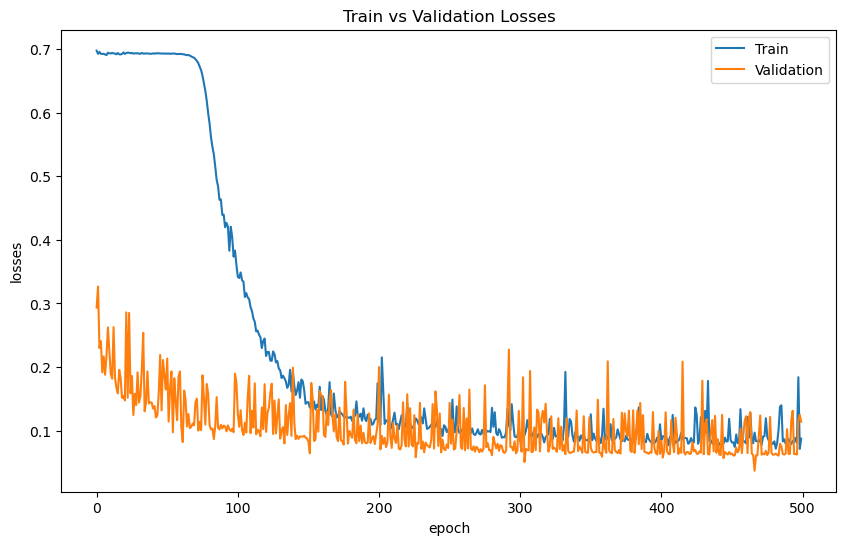

In [38]:
import matplotlib.pyplot as plt
plt.plot(train_losses,'-')
plt.plot(eval_losses,'-')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Validation'])
plt.title('Train vs Validation Losses')
 
plt.show()

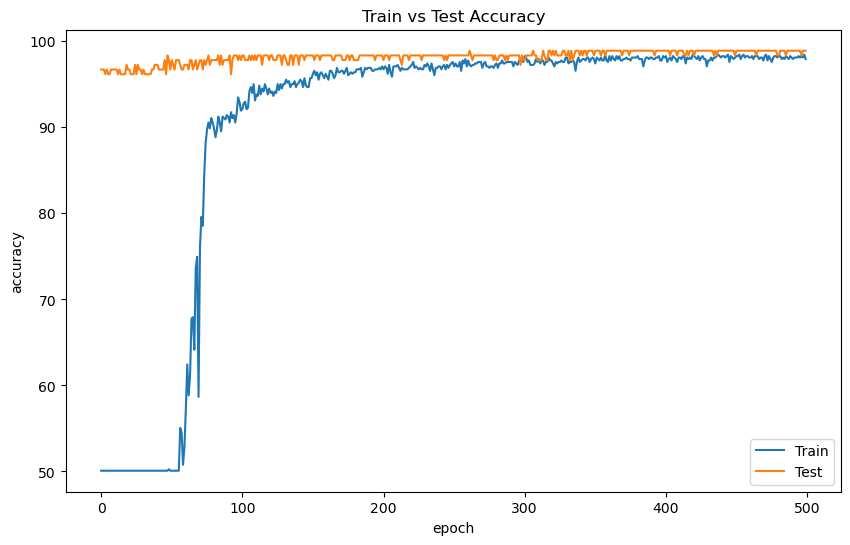

In [39]:
plt.plot(train_accu,'-')
plt.plot(test_accu,'-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
 
plt.show()

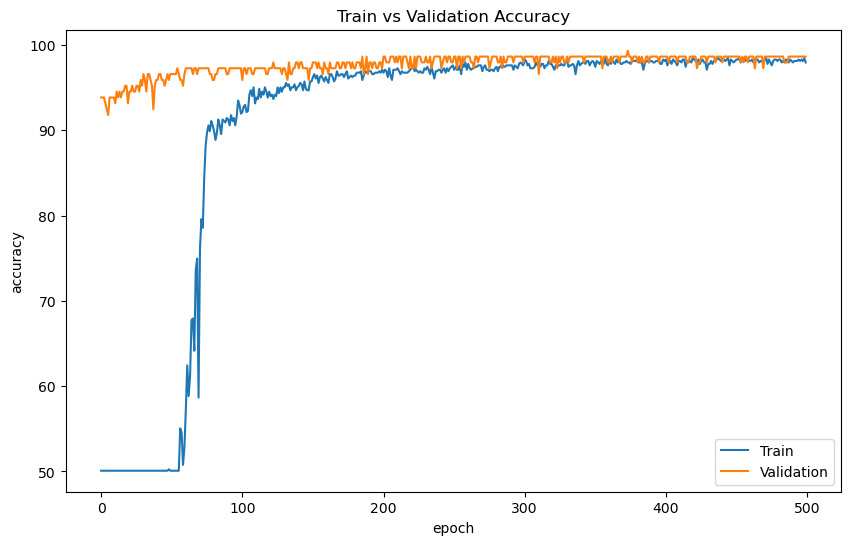

In [40]:
plt.plot(train_accu,'-')
plt.plot(eval_accu,'-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'])
plt.title('Train vs Validation Accuracy')
 
plt.show()

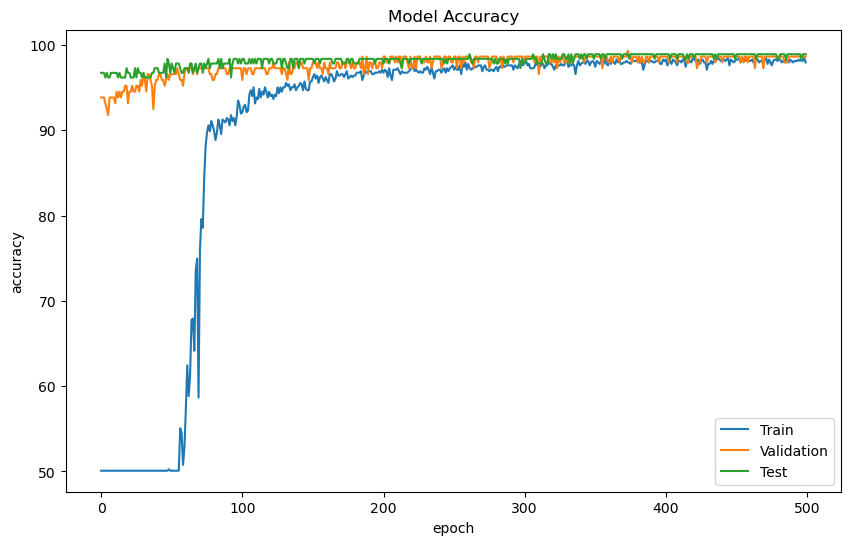

In [43]:
plt.plot(train_accu,'-')
plt.plot(eval_accu,'-')
plt.plot(test_accu,'-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation','Test'])
plt.title('Model Accuracy')
plt.savefig('Model Accuracy')
 
plt.show()

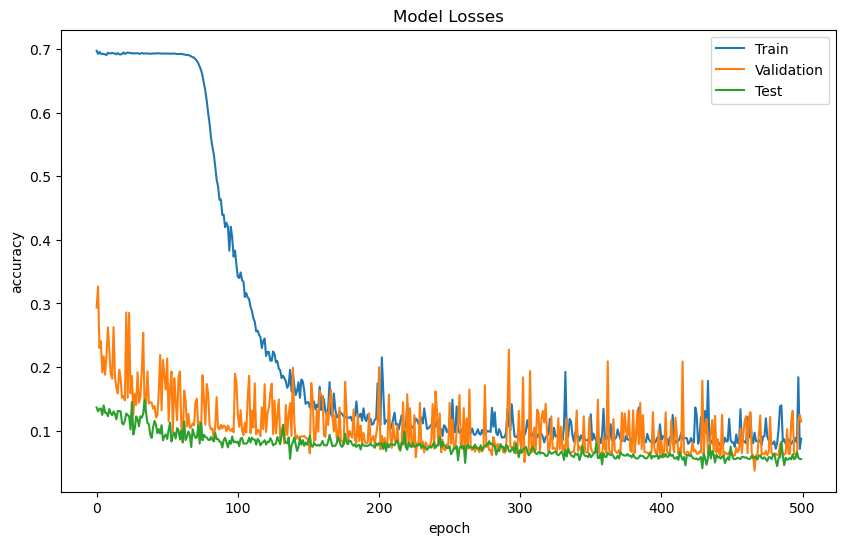

In [44]:
plt.plot(train_losses,'-')
plt.plot(eval_losses,'-')
plt.plot(test_losses,'-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation','Test'])
plt.title('Model Losses')
plt.savefig('Model Losses')
 
plt.show()